## Workflow
In this notebook we're going to reiterate over the PyTorch workflow we covered in [01. PyTorch Workflow](https://www.learnpytorch.io/02_pytorch_classification/).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="a pytorch workflow flowchart" width=900/>

Except instead of trying to predict a straight line (predicting a number, also called a regression problem), we'll be working on a **classification problem**.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Getting binary classification data ready** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. |
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together with multi-class classification** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |


PyTorch Neural Network Classification



For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

    
Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch.

In other words, taking a set of inputs and predicting what class those set of inputs belong to.




## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## 1. Make classification data and get it ready


We'll use the [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) method from Scikit-Learn to generate two circles with different coloured dots.

In [2]:
from sklearn.datasets import make_circles
# Make 1000 samples
n_samples= 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)


In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# y # two classes (binary classification)

In [6]:
# Make dataframe of circle data
import pandas as pd
circle = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                       "label": y})
circle.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
circle.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

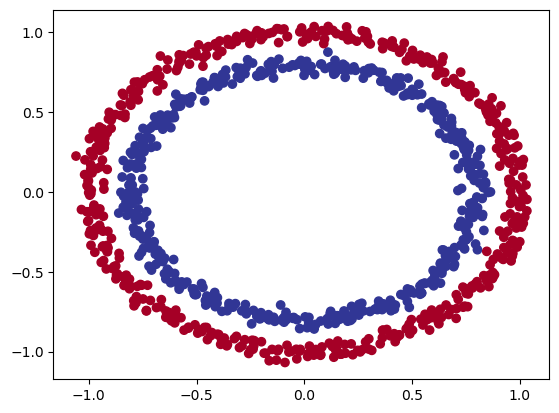

In [8]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:** This dataset is often what's considered a **toy problem** (a problem that's used to try and test things out on) in machine learning.

### 1.1 Check input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
# View the first samople of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")
# y is scalar which has no shape

Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [12]:
import torch
torch.__version__

'2.5.1'

In [13]:
type(X) , X.dtype

(numpy.ndarray, dtype('float64'))

In [14]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [16]:
# Split data into train adn test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

We've got some data ready, now it's time to build a model.

We'll break it down into a few parts.

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing `nn.Module`.
3. Defining a loss function and optimizer.
4. Creating a training loop

In [18]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

We'll want a model capable of handling our `X` data as inputs and producing something in the shape of our `y` data as outputs.
Let's create a model class that:
1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [19]:
# 1. Construct a model that sublcass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # # 2. Create 2 nn.Linear of handling the shapes o four data
    # self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    # self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and upscales to 1 feature

    self.two_linear_layers = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
    )
  # 3. Define a forward() method
  def forward(self,x):
    # return self.layer_2(self.layer_1(x)) # x - > layer1 -> layer2 - > output
    return self.two_linear_layers(x)
# 4. Instantiates the model class and sends it to the target device.
model_0 = CircleModelV0().to(device)


In [20]:
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [21]:
device

'cpu'

In [22]:
next(model_0.parameters()).device

device(type='cpu')

In [23]:
# Replicating the model using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1843,  0.0435],
                      [-0.2553,  0.2270],
                      [-0.0804, -0.4501],
                      [ 0.2806,  0.2834],
                      [ 0.3252, -0.4182]])),
             ('0.bias', tensor([-0.6351, -0.4846, -0.5549, -0.1432,  0.2550])),
             ('1.weight',
              tensor([[ 0.1001, -0.4147, -0.1788,  0.1029,  0.0355]])),
             ('1.bias', tensor([0.2595]))])

In [25]:
# make some predicitons
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"\nLenght of predictions: {len(untrained_preds)}, Shape {untrained_preds.shape}")
  print(f"\nLenght of test samples: {len(X_test)}, Shape {X_test.shape}")
  print(f"\nFirst 10 Predicitons:\n {untrained_preds[:10]}")
  print(f"\nFirst 10 Labels:\n {y_test[:10]}")



Lenght of predictions: 200, Shape torch.Size([200, 1])

Lenght of test samples: 200, Shape torch.Size([200, 2])

First 10 Predicitons:
 tensor([[0.4404],
        [0.4974],
        [0.3888],
        [0.4546],
        [0.5439],
        [0.5774],
        [0.6148],
        [0.6340],
        [0.3824],
        [0.5029]])

First 10 Labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [26]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## Loss and optimizer

In [27]:
# Defining a loss function and optimizer.
# loss_fn = nn.BCELoss() # requires inputs to have gone through sigmoid avtivation function
loss_fn = nn.BCEWithLogitsLoss() # has sigmoid function built in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1843,  0.0435],
                      [-0.2553,  0.2270],
                      [-0.0804, -0.4501],
                      [ 0.2806,  0.2834],
                      [ 0.3252, -0.4182]])),
             ('0.bias', tensor([-0.6351, -0.4846, -0.5549, -0.1432,  0.2550])),
             ('1.weight',
              tensor([[ 0.1001, -0.4147, -0.1788,  0.1029,  0.0355]])),
             ('1.bias', tensor([0.2595]))])

In [29]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## Train model

1. Forward pass
2. Clculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizers step (gradient descent)

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

Before the training loop steps, let's see what comes out of our model during the forward pass (the forward pass is defined by the `forward()` method).

To do so, let's pass the model some data.

In [30]:
# View the frist 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.4404],
        [0.4974],
        [0.3888],
        [0.4546],
        [0.5439]])

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# use the sigmoid activation function on our model logits to turn them into predicition probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6084],
        [0.6218],
        [0.5960],
        [0.6117],
        [0.6327]])

In [33]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

Okay, it seems like the outputs now have some kind of consistency (even though they're still random).

They're now in the form of **prediction probabilities** (I usually refer to these as `y_pred_probs`), in other words, the values are now how much the model thinks the data point belongs to one class or another.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:
* If `y_pred_probs` >= 0.5, `y=1` (class 1)
* If `y_pred_probs` < 0.5, `y=0` (class 0)

To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoid activation function.

In [34]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_label = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_label.squeeze()))

# get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [36]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training loop 
for epoch in range(epochs):
    ### Training
    model_0.train()
    
    # 1.Forward Pass
    y_logits = model_0.forward(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
    #                y_train)
    loss = loss_fn(y_logits  # nn.BCEWithLogitsLoss expects raw logits as input
                    ,y_train) 
    acc = accuracy_fn(y_true=y_train,
                        y_pred=y_pred)
    
    # 3.Optimizer zero grad
    optimizer.zero_grad()
    
    # 4.Loss backward
    loss.backward()
    
    # 5.Optimizer step (gradent descent)
    optimizer.step()
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1.Forward pass 
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2.Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)
        
        # print the process
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} - Loss: {loss:.5f} - Acc: {acc:.2f}% - Test Loss: {test_loss:.5f} - Test accuracy: {test_acc:.2f}%")

Epoch: 0 - Loss: 0.72349 - Acc: 50.00% - Test Loss: 0.72229 - Test accuracy: 50.00%
Epoch: 10 - Loss: 0.70294 - Acc: 50.00% - Test Loss: 0.70371 - Test accuracy: 50.00%
Epoch: 20 - Loss: 0.69629 - Acc: 50.00% - Test Loss: 0.69764 - Test accuracy: 50.00%
Epoch: 30 - Loss: 0.69412 - Acc: 50.00% - Test Loss: 0.69563 - Test accuracy: 50.00%
Epoch: 40 - Loss: 0.69341 - Acc: 55.50% - Test Loss: 0.69496 - Test accuracy: 49.50%
Epoch: 50 - Loss: 0.69317 - Acc: 52.88% - Test Loss: 0.69474 - Test accuracy: 47.00%
Epoch: 60 - Loss: 0.69309 - Acc: 52.38% - Test Loss: 0.69467 - Test accuracy: 47.00%
Epoch: 70 - Loss: 0.69306 - Acc: 50.75% - Test Loss: 0.69466 - Test accuracy: 47.00%
Epoch: 80 - Loss: 0.69304 - Acc: 50.75% - Test Loss: 0.69466 - Test accuracy: 47.00%
Epoch: 90 - Loss: 0.69303 - Acc: 50.75% - Test Loss: 0.69467 - Test accuracy: 47.50%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything... 
So to inspect it let's make some predictions and make them visual! 
In other words, "Visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py 

In [37]:
import requests 
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


In [38]:
!git add .
!git commit -m "comment torchvision in helper_functions.py"

[master d2820d3] comment torchvision in helper_functions.py
 1 file changed, 0 insertions(+), 0 deletions(-)


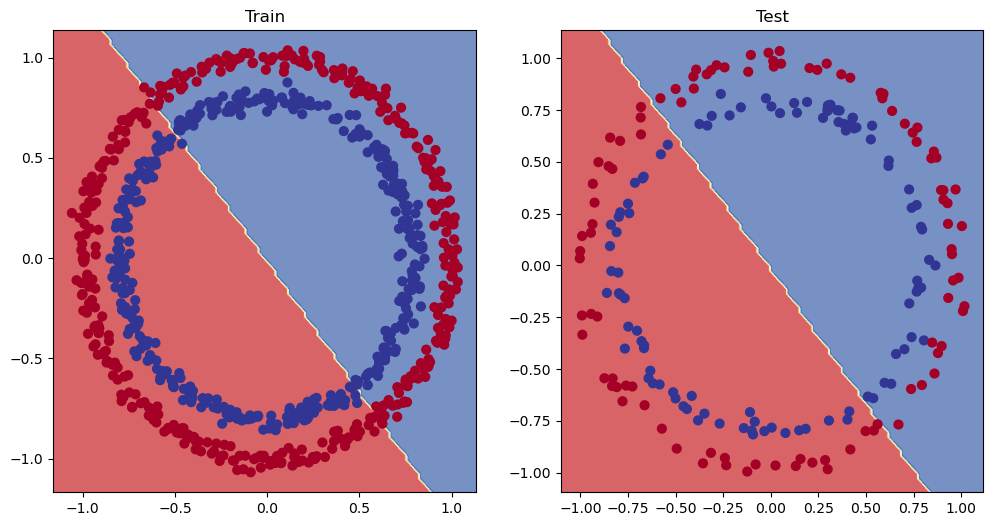

In [39]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test) 

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units 
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function 

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [40]:
# Create a model
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [42]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [43]:
# Training and testing loops
torch.manual_seed(42)

epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### training
    model_1.train()
    
    # 1.Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2.Calculate the loss 
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                        y_pred=y_pred)
    
    # 3.Optimizer zero grad
    optimizer.zero_grad()
    
    # 4.Loss backward
    loss.backward()
    
    # 5.Optimizer step
    optimizer.step()  
    
    ### testing
    model_1.eval()
    with torch.inference_mode():
        #1.Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #2.Calculate the test loss
        test_loss = loss_fn(test_logits, y_test)
        acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
    if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 51.00% | Test loss: 0.69261, Test acc: 48.00%
Epoch: 100 | Loss: 0.69305, Acc: 48.00% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 46.00% | Test loss: 0.69437, Test acc: 48.00%
Epoch: 300 | Loss: 0.69298, Acc: 45.00% | Test loss: 0.69458, Test acc: 48.00%
Epoch: 400 | Loss: 0.69298, Acc: 46.00% | Test loss: 0.69465, Test acc: 48.00%
Epoch: 500 | Loss: 0.69298, Acc: 46.00% | Test loss: 0.69467, Test acc: 48.00%
Epoch: 600 | Loss: 0.69298, Acc: 46.00% | Test loss: 0.69468, Test acc: 48.00%
Epoch: 700 | Loss: 0.69298, Acc: 46.00% | Test loss: 0.69468, Test acc: 48.00%
Epoch: 800 | Loss: 0.69298, Acc: 46.00% | Test loss: 0.69468, Test acc: 48.00%
Epoch: 900 | Loss: 0.69298, Acc: 46.00% | Test loss: 0.69468, Test acc: 48.00%


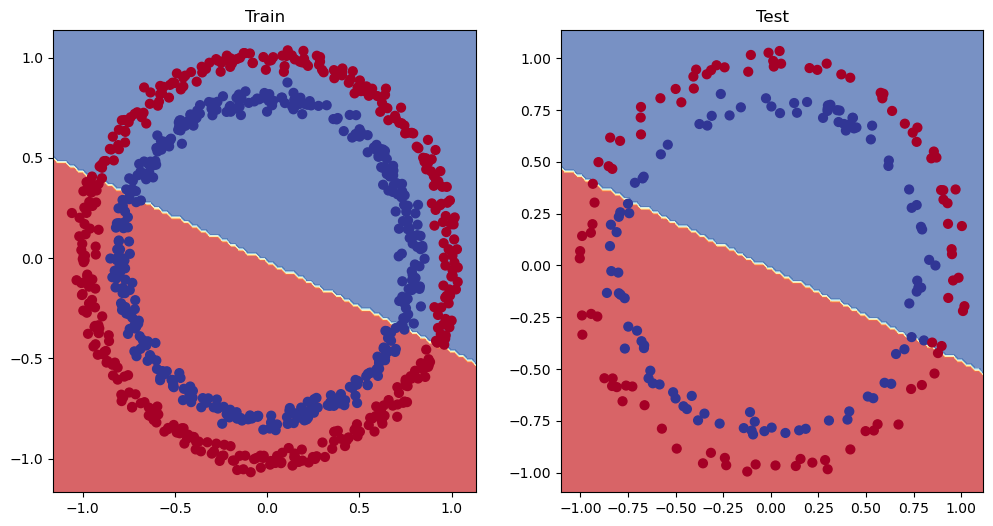

In [44]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) 

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [45]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [46]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

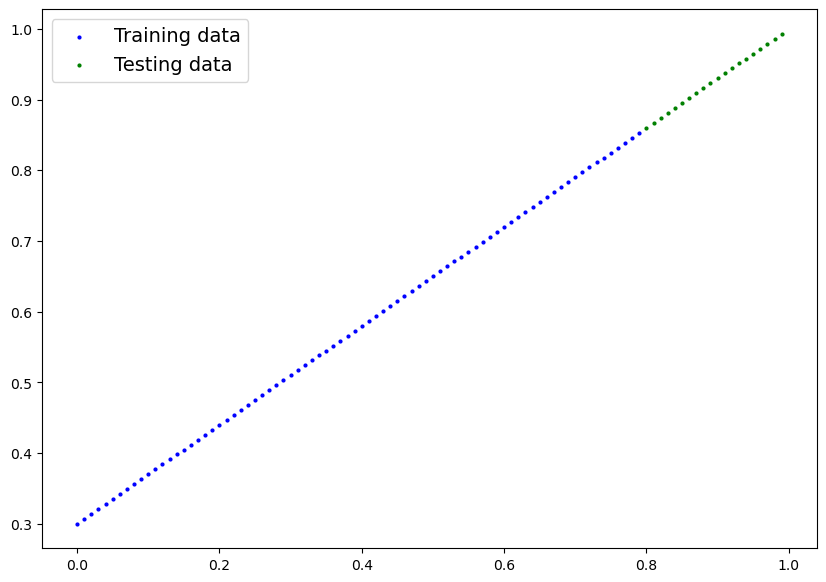

In [47]:
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

### 5.2 Adjusting `model_1` to fit a straight line

In [48]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# Loss and optimzier
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ### testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    # Print out what's happenin'
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")   

Epoch: 0 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 1000 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 2000 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 3000 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 4000 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 5000 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 6000 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 7000 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 8000 | Loss: 0.66707 | Test loss: 0.40875
Epoch: 9000 | Loss: 0.66707 | Test loss: 0.40875


In [51]:
# Turn on evaluation mode
model_2.eval()

# Maek prediction (inference)
with torch.inference_mode():
    y_pred = model_2(X_test_regression)
    
y_pred.shape , y_test_regression.shape , X_test_regression.shape, X_train_regression.shape,y_train_regression.shape


(torch.Size([20, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]),
 torch.Size([80, 1]),
 torch.Size([80, 1]))

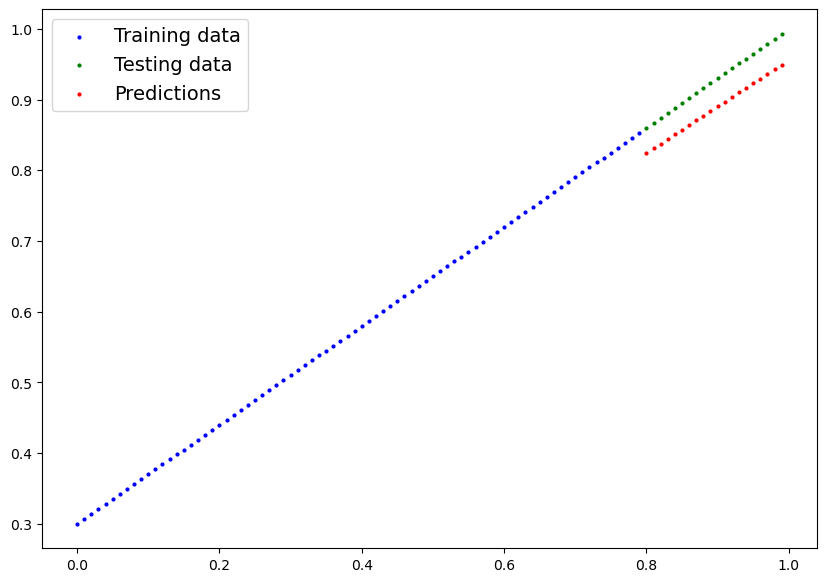

In [52]:

# Plot data and predictions
plot_predictions(train_data=X_train_regression, 
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression,
                predictions=y_pred); 


## 6. The missing piece: non-linearity 


### 6.1 Recreating non-linear data (red and blue circles)

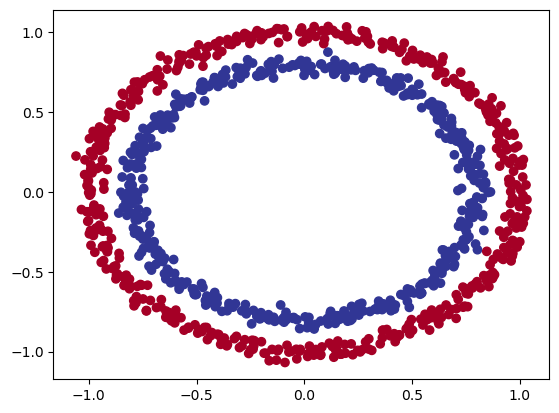

In [110]:
# Make an plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [111]:
# Convert data to tensors and then to train and test splits 
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42) 

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [157]:
# Build a model with non - linear Activation functions
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=8)
        self.layer_2 = nn.Linear(in_features=8, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=16)
        self.layer_4 = nn.Linear(in_features=16, out_features=32)
        self.layer_5 = nn.Linear(in_features=32, out_features=16)
        self.layer_6 = nn.Linear(in_features=16, out_features=16)
        self.layer_7 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x): 
        # Where should we put our non-linear activation functions?
        return self.layer_7(self.relu
                (self.layer_6(self.relu
                (self.layer_5(self.relu
                (self.layer_4(self.relu
                (self.layer_3(self.relu
                (self.layer_2(self.relu
                (self.layer_1(x)))))))))))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=16, bias=True)
  (layer_4): Linear(in_features=16, out_features=32, bias=True)
  (layer_5): Linear(in_features=32, out_features=16, bias=True)
  (layer_6): Linear(in_features=16, out_features=16, bias=True)
  (layer_7): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [86]:
!git add .
!git commit -m "created model 3"

On branch master
nothing to commit, working tree clean


In [161]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(),
                            lr=0.001)

### 6.3 Training a model with non-linearity

In [162]:
# Random seeds 
torch.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 10000

for epoch in range(epochs):
    ### Training
    model_3.train()
    
    # Forward path
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
    acc = accuracy_fn(y_true=y_train,
                        y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Loss backward
    loss.backward()
    
    # optimizer step
    optimizer.step()
    
    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
        
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6965, Acc: 50.00% | Test Loss: 0.6963, Test Acc: 50.00%
Epoch: 1000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0016, Test Acc: 100.00%
Epoch: 2000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0010, Test Acc: 100.00%
Epoch: 3000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0007, Test Acc: 100.00%
Epoch: 4000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0005, Test Acc: 100.00%
Epoch: 5000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0004, Test Acc: 100.00%
Epoch: 6000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0003, Test Acc: 100.00%
Epoch: 7000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0002, Test Acc: 100.00%
Epoch: 8000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0002, Test Acc: 100.00%
Epoch: 9000 | Loss: 0.0000, Acc: 100.00% | Test Loss: 0.0001, Test Acc: 100.00%


In [121]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1312, -0.4152],
                      [ 0.1066,  0.6813],
                      [ 0.4850, -0.5507],
                      [ 0.6455,  0.0548],
                      [ 0.3401,  0.5492],
                      [ 0.6028, -0.5512],
                      [ 0.6192, -0.4802],
                      [ 0.0530, -0.4941],
                      [-0.1550, -0.0321],
                      [-0.0846, -0.1117],
                      [ 0.0558,  0.6975],
                      [ 0.4108,  0.3956],
                      [ 0.2830,  0.5474],
                      [-0.0326,  0.0562],
                      [ 0.1455, -0.6167],
                      [-0.5696,  0.0867]])),
             ('layer_1.bias',
              tensor([-0.2767, -0.0130, -0.1623,  0.1101,  0.4601, -0.2345,  0.5663,  0.5583,
                      -0.5427, -0.5460, -0.5721, -0.3875, -0.2753, -0.0532, -0.1720, -0.3573])),
             ('layer_2.weight',
              tensor([[-7.9423e-02, -9.0

### 6.4 Evaluating a model trained with non-linear activation functions

In [164]:
# make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

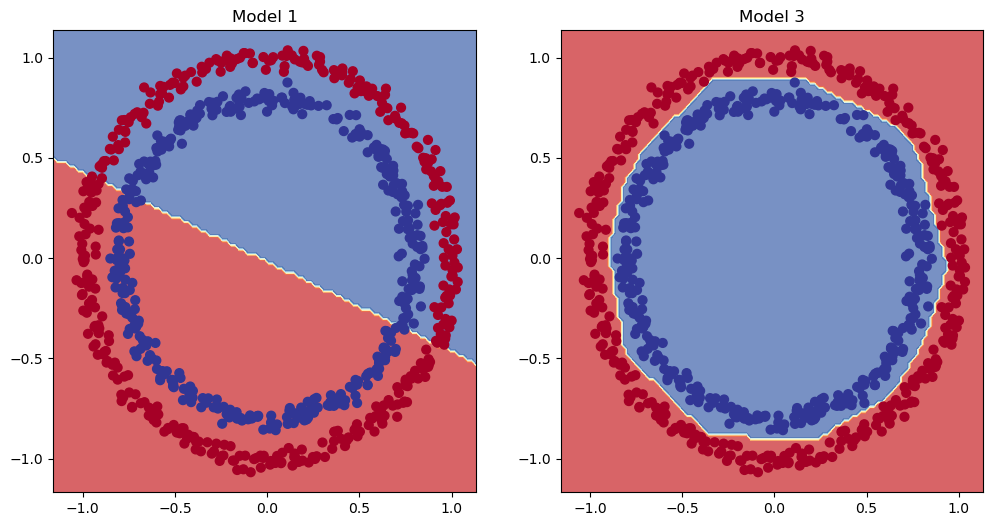

In [165]:
# plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model 1") # no non-linearity
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Model 3") # has linearity
plot_decision_boundary(model_3, X_train, y_train)

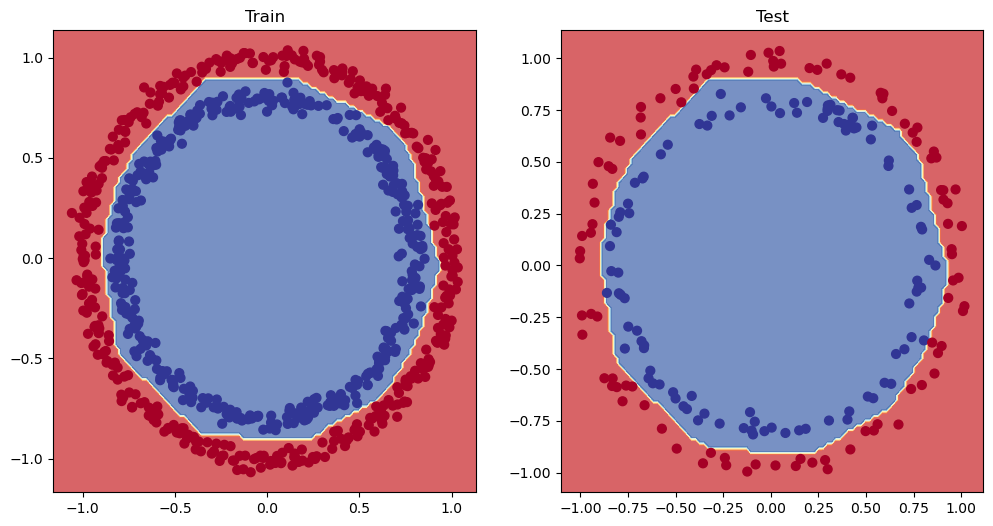

In [166]:
# plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions.

In [171]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [172]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

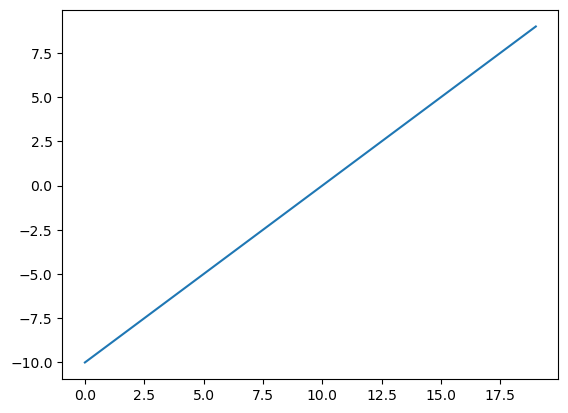

In [174]:
# Visualize the tensor
plt.plot(A);

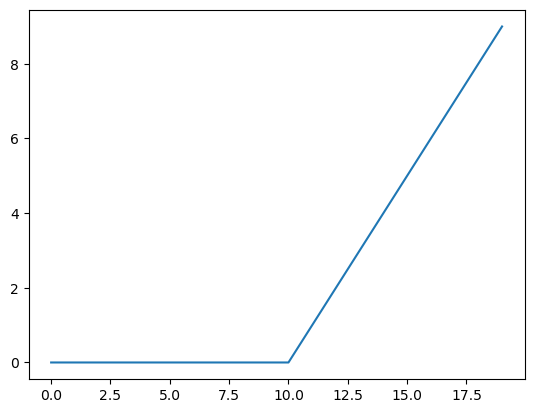

In [175]:
plt.plot(torch.relu(A));

In [176]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [177]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # input must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

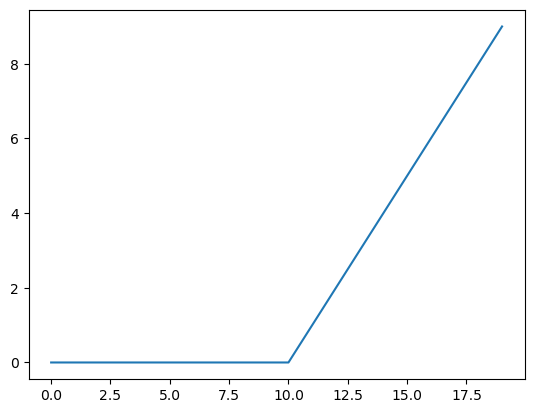

In [ ]:
# plot Relu activation function
plt.plot(relu(A));

In [180]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

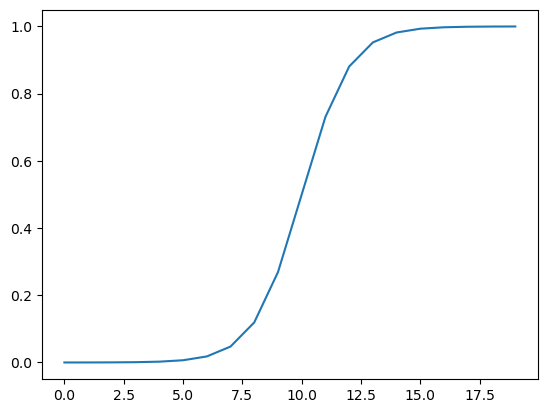

In [181]:
plt.plot(torch.sigmoid(A));

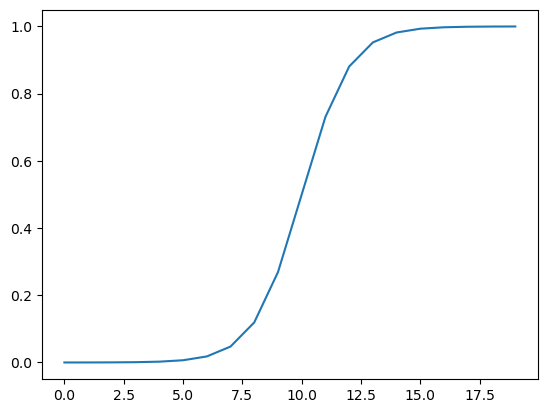

In [182]:
plt.plot(sigmoid(A));

In [183]:
!git add . 
!git commit -m "Replicating activation functions"

[master 0105918] Replicating activation functions
 1 file changed, 651 insertions(+), 43 deletions(-)


## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

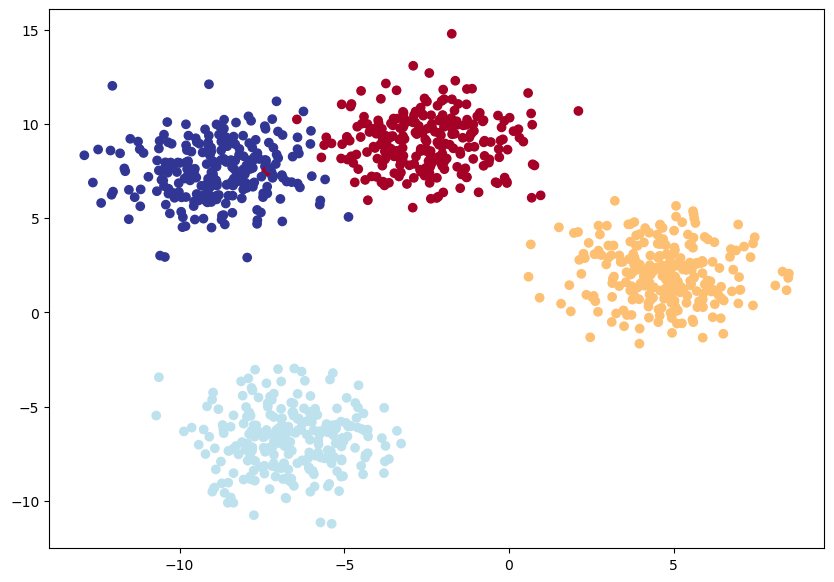

In [230]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs 
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in PyTorch

In [231]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [282]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initialize multi-class classification model.
        
        Args:
            input features (int): Number of input features to the model
            output features (init): NUmber of outputs features (number of output classes)
            hiddne_units (int): NUmber of hidden units between layers , default 8.
        
        Returns:

        Example:
            """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # we can not use non-linear because our data is linearly seperable
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x)
    
# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [283]:
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.276

In [284]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [285]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [286]:
# Create a loss function for multi-class classification - loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.01) # learning rate is a hyperparameter you can change

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logtis) to predicition probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the `torch.argmax` of the prediction probabilities)

**Logits (logits) -> Pred probs (pred_probs) -> Pred Label (preds)**  

In [287]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
    
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [288]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [289]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [290]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [291]:
torch.argmax(y_pred_probs[0]) # to know the index 

tensor(1)

In [292]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [293]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [294]:
### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    ### Training
    model_4.train()
    
    # Forward path
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    # y_pred = torch.argmax(y_logits, dim=1)
    
    # Calculate the loss
    loss = loss_fn(y_logits,y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                        y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Loss backwards
    loss.backward()
    
    # Optimizer step
    optimizer.step()
    
    model_4.eval()
    with torch.inference_mode():
        ### Testing
        # Forward path
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        # Calculate the loss
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                                y_pred=test_pred)
    # Print what is happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} - Loss: {loss:4f}, Acc: {acc:.2f}% - Test Loss: {test_loss:4f}, Test Acc: {test_acc:.2f}% ")

Epoch: 0 - Loss: 1.158827, Acc: 40.38% - Test Loss: 1.147240, Test Acc: 38.50% 
Epoch: 10 - Loss: 1.064932, Acc: 55.38% - Test Loss: 1.068411, Test Acc: 50.50% 
Epoch: 20 - Loss: 0.981897, Acc: 62.62% - Test Loss: 0.997558, Test Acc: 57.50% 
Epoch: 30 - Loss: 0.911385, Acc: 70.50% - Test Loss: 0.936003, Test Acc: 67.00% 
Epoch: 40 - Loss: 0.852853, Acc: 88.38% - Test Loss: 0.883407, Test Acc: 87.50% 
Epoch: 50 - Loss: 0.804297, Acc: 92.12% - Test Loss: 0.838514, Test Acc: 93.00% 
Epoch: 60 - Loss: 0.763501, Acc: 93.62% - Test Loss: 0.799844, Test Acc: 94.50% 
Epoch: 70 - Loss: 0.728481, Acc: 94.88% - Test Loss: 0.765948, Test Acc: 95.00% 
Epoch: 80 - Loss: 0.697686, Acc: 95.62% - Test Loss: 0.735558, Test Acc: 95.00% 
Epoch: 90 - Loss: 0.669784, Acc: 96.38% - Test Loss: 0.707585, Test Acc: 96.50% 


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [295]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
# View the first 10 predictions
y_logits[:10]    

tensor([[-1.5520,  1.7702, -3.0464, -2.5323],
        [-0.1348, -2.3305, -2.3721,  0.0972],
        [ 0.1727, -0.2462,  0.3317, -0.0312],
        [-0.9623,  1.3257, -1.6128, -1.5732],
        [ 0.0045, -2.1045, -3.4698, -0.7000],
        [-0.2060, -2.6914, -2.7822,  0.1333],
        [ 0.0815, -0.3303,  0.2308, -0.0381],
        [ 0.0133, -2.3748, -2.8843, -0.2998],
        [ 0.1518, -0.3270,  0.2987, -0.0882],
        [ 0.0534, -2.3575, -2.9727, -0.3954]])

In [296]:
y_blob_test # True values 

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [297]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0.0341, 0.9454, 0.0077, 0.0128],
        [0.4034, 0.0449, 0.0431, 0.5087],
        [0.2743, 0.1804, 0.3216, 0.2237],
        [0.0839, 0.8268, 0.0438, 0.0455],
        [0.6073, 0.0737, 0.0188, 0.3002],
        [0.3901, 0.0325, 0.0297, 0.5477],
        [0.2695, 0.1785, 0.3129, 0.2391],
        [0.5324, 0.0489, 0.0294, 0.3893],
        [0.2805, 0.1738, 0.3250, 0.2207],
        [0.5629, 0.0505, 0.0273, 0.3593]])

In [298]:
# Go from Prediction probabilities -> Predcition labels
y_pred = torch.argmax(y_pred_probs, dim=1) 
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

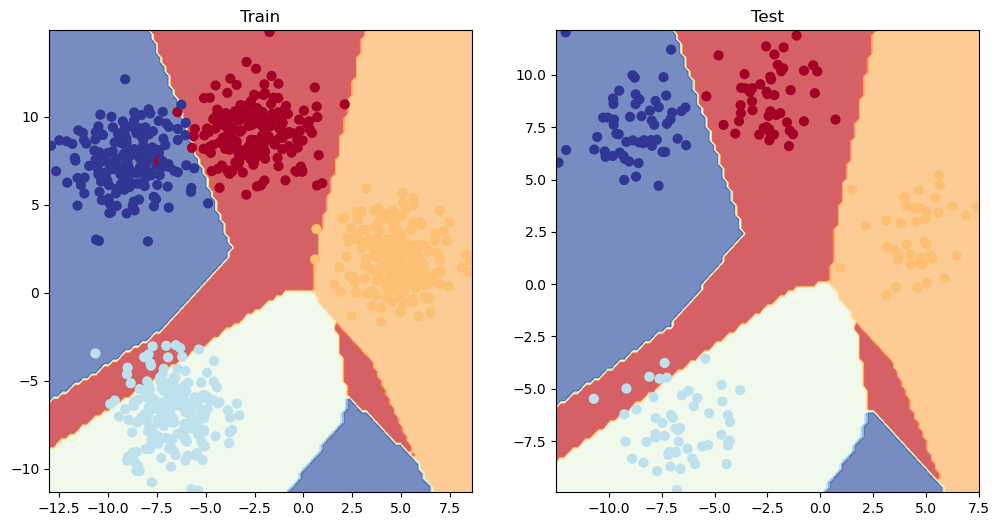

In [299]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall 
* F1-score
* Confusion matrix
* Classification report

See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/latest/ 

In [300]:
# !pip install torchmetrics

In [303]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetric_accuracy(y_pred, y_blob_test)

tensor(0.9700)

In [304]:
!git add .
!git commit -m "Finished Classification video"

On branch master
nothing to commit, working tree clean


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

It looks like our trained model is performing pretty well.

But to make sure of this, let's make some predictions and visualize them.

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

Alright, looks like our model's predictions are still in logit form.

Though to evaluate them, they'll have to be in the same form as our labels (`y_blob_test`) which are in integer form.

Let's convert our model's prediction logits to prediction probabilities (using `torch.softmax()`) then to prediction labels (by taking the `argmax()` of each sample).

> **Note:** It's possible to skip the `torch.softmax()` function and go straight from `predicted logits -> predicted labels` by calling `torch.argmax()` directly on the logits.
>
> For example, `y_preds = torch.argmax(y_logits, dim=1)`, this saves a computation step (no `torch.softmax()`) but results in no prediction probabilities being available to use.

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


Nice! Our model predictions are now in the same form as our test labels.

Let's visualize them with `plot_decision_boundary()`, remember because our data is on the GPU, we'll have to move it to the CPU for use with matplotlib (`plot_decision_boundary()` does this automatically for us).

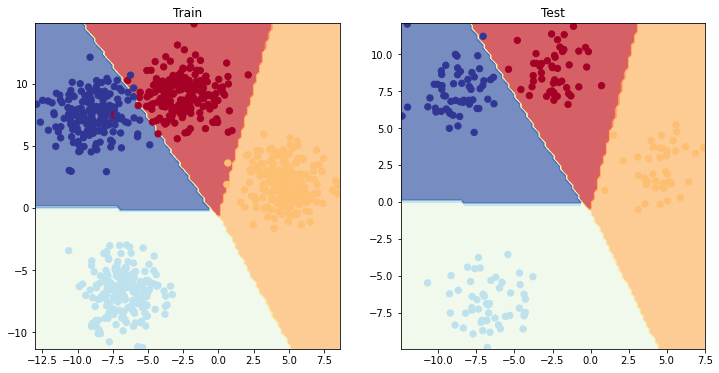

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. More classification evaluation metrics

So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate your classification model using more metrics such as the following:

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) or [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) or [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) or [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) or [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Scikit-Learn (a popular and world-class machine learning library) has many implementations of the above metrics and you're looking for a PyTorch-like version, check out [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/), especially the [TorchMetrics classification section](https://torchmetrics.readthedocs.io/en/stable/pages/classification.html).

Let's try the `torchmetrics.Accuracy` metric out.




In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

## Exercises

All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agonistic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

Resources:
* [Exercise template notebook for 02](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb)
* [Example solutions notebook for 02](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/02_pytorch_classification_exercise_solutions.ipynb) (try the exercises *before* looking at this)

1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
    * For consistency, the dataset should have 1000 samples and a `random_state=42`.
    * Turn the data into PyTorch tensors. Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.
2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
    * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.
3. Setup a binary classification compatible loss function and optimizer to use when training the model.
4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
    * To measure model accuracy, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
    * Train the model for long enough for it to reach over 96% accuracy.
    * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.
5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.
6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
    * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.
7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
    * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
    * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
    * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
    * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

```python
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
```

## Extra-curriculum

* Write down 3 problems where you think machine classification could be useful (these can be anything, get creative as you like, for example, classifying credit card transactions as fraud or not fraud based on the purchase amount and purchase location features).
* Research the concept of "momentum" in gradient-based optimizers (like SGD or Adam), what does it mean?
* Spend 10-minutes reading the [Wikipedia page for different activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions), how many of these can you line up with [PyTorch's activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)?
* Research when accuracy might be a poor metric to use (hint: read ["Beyond Accuracy" by Will Koehrsen](https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/) for ideas).
* **Watch:** For an idea of what's happening within our neural networks and what they're doing to learn, watch [MIT's Introduction to Deep Learning video](https://youtu.be/7sB052Pz0sQ).